In [1]:
import os
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from tqdm import tqdm
from PIL import Image

DATA_DIR = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/images'

print("Проверка существования папки:", os.path.exists(DATA_DIR))
print("Количество папок-классов:", len(os.listdir(DATA_DIR)))

Проверка существования папки: True
Количество папок-классов: 1000


In [2]:
import os

IMAGES_DIR = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/images'

print("Путь существует?", os.path.exists(IMAGES_DIR))
print("Количество элементов в папке images:", len(os.listdir(IMAGES_DIR)))

print("Первые 10 элементов:")
print(os.listdir(IMAGES_DIR)[:10])

folders = [
    f for f in os.listdir(IMAGES_DIR)
    if os.path.isdir(os.path.join(IMAGES_DIR, f))
]

print("Количество папок-классов:", len(folders))

Путь существует? True
Количество элементов в папке images: 1000
Первые 10 элементов:
['n01531178', 'n02412080', 'n02098413', 'n01797886', 'n04589890', 'n02437312', 'n03976657', 'n07716358', 'n03461385', 'n07753592']
Количество папок-классов: 1000


In [4]:
import json

# Пути к данным
IMAGES_DIR = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/images'
JSON_PATH = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/imagenet_class_index.json'

# Загружаем датасет
dataset = ImageFolder(IMAGES_DIR)

# Загружаем соответствие индексов ImageNet → (wnid, название)
with open(JSON_PATH, 'r') as f:
    mapping = json.load(f)
    # пример: {"0": ["n01440764", "tench"], ...}

# Создаем словарь
wnid_to_name = {}
for idx_str, (wnid, name) in mapping.items():
    wnid_to_name[wnid] = name

# Получаем читаемые названия классов датасета
class_names = []
for wnid in dataset.classes:
    name = wnid_to_name.get(wnid, 'Неизвестно')
    class_names.append(name)

# Поиск кошек
cat_keywords = ['cat', 'kitten', 'persian', 'siamese']

cat_classes = [
    name for name in class_names
    if any(keyword in name.lower() for keyword in cat_keywords)
]

print("\nНайденные классы кошек:")
if cat_classes:
    for cls in cat_classes:
        print("•", cls)
else:
    print("Классы кошек не найдены.")


Найденные классы кошек:
• oystercatcher
• tiger_cat
• Persian_cat
• Siamese_cat
• Egyptian_cat
• polecat
• Madagascar_cat
• catamaran


Баланс классов — общая статистика:
count    1000.0
mean        3.9
std         1.5
min         1.0
25%         3.0
50%         4.0
75%         4.0
max        14.0
Name: count, dtype: float64

Всего классов: 1000
Минимальное количество изображений в классе: 1
Максимальное количество изображений в классе: 14
Среднее на класс: 3.9

10 самых редких классов:
                 name  count       wnid
935     mashed_potato      1  n07711569
564       four-poster      1  n03388549
594              harp      1  n03495258
695           padlock      1  n03874599
122  American_lobster      1  n01983481
73        barn_spider      1  n01773549
71           scorpion      1  n01770393
963             pizza      2  n07873807
901       whiskey_jug      2  n04579145
885            velvet      2  n04525038

10 самых частых классов:
               name  count       wnid
550  espresso_maker     14  n03297495
902         whistle     13  n04579432
291            lion     12  n02129165
371           patas     11

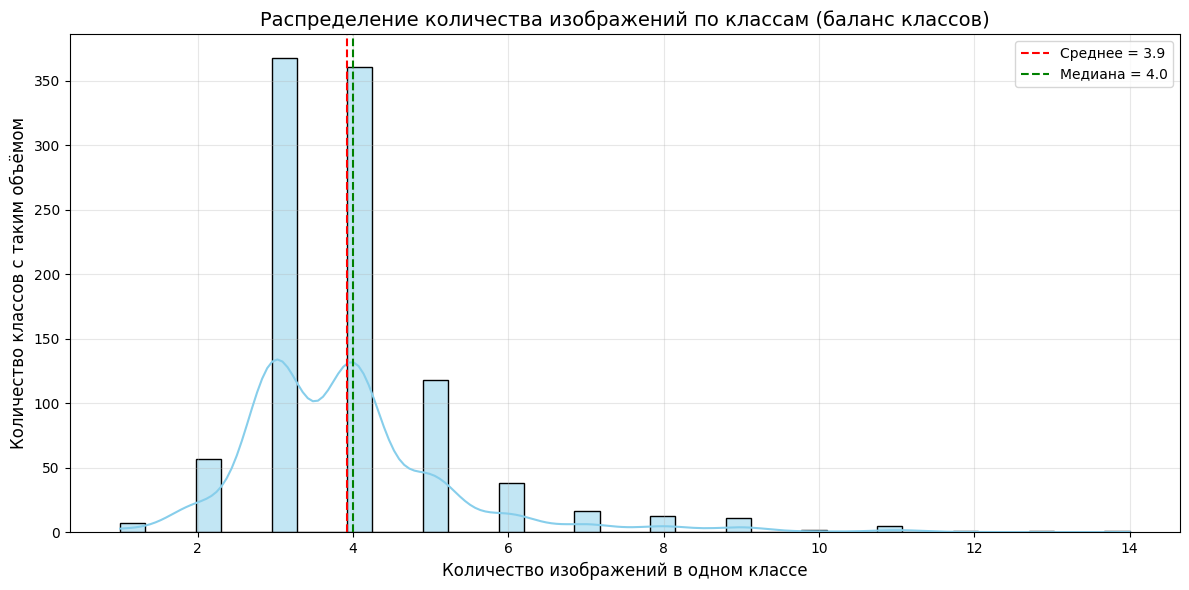

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Загружаем датасет
dataset = ImageFolder(IMAGES_DIR)

# labels — индексы классов для каждого изображения
labels = [label for _, label in dataset.imgs]
class_counts = Counter(labels)  # или dataset.targets

# DataFrame с балансом классов
df_balance = pd.DataFrame({
    'class_index': range(len(dataset.classes)),
    'wnid': dataset.classes,
    'name': class_names,  # из JSON
    'count': [class_counts.get(i, 0) for i in range(len(dataset.classes))]
}).sort_values('count')

# Основная статистика
print("Баланс классов — общая статистика:")
print(df_balance['count'].describe().round(1))

print("\nВсего классов:", len(df_balance))
print("Минимальное количество изображений в классе:", df_balance['count'].min())
print("Максимальное количество изображений в классе:", df_balance['count'].max())
print("Среднее на класс:", df_balance['count'].mean().round(1))

# 10 самых редких классов
print("\n10 самых редких классов:")
print(df_balance.head(10)[['name', 'count', 'wnid']])

# 10 самых частых классов
print("\n10 самых частых классов:")
print(df_balance.tail(10)[['name', 'count', 'wnid']].sort_values('count', ascending=False))

# Гистограмма распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=df_balance, x='count', bins=40, kde=True, color='skyblue')

plt.title('Распределение количества изображений по классам (баланс классов)', fontsize=14)
plt.xlabel('Количество изображений в одном классе', fontsize=12)
plt.ylabel('Количество классов с таким объёмом', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавим вертикальные линии для наглядности
plt.axvline(df_balance['count'].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Среднее = {df_balance["count"].mean():.1f}')
plt.axvline(df_balance['count'].median(), color='green', linestyle='--', linewidth=1.5, label=f'Медиана = {df_balance["count"].median():.1f}')

plt.legend()
plt.tight_layout()
plt.show()

In [6]:
from PIL import Image

# Путь к папке с изображениями
IMAGES_DIR = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/images'

# Загружаем датасет
dataset = ImageFolder(IMAGES_DIR)

# Считаем общее количество классов и файлов
total_classes = len(dataset.classes)
all_files = [img_path for img_path, _ in dataset.imgs]
total_files = len(all_files)

# Проверка существования файлов
missing_files = [f for f in all_files if not os.path.exists(f)]
num_missing = len(missing_files)

# Проверка битых/повреждённых изображений
corrupted_files = []
for f in all_files:
    if os.path.exists(f):
        try:
            img = Image.open(f)
            img.verify()  # проверка целостности файла
        except Exception:
            corrupted_files.append(f)

num_corrupted = len(corrupted_files)
percent_corrupted = (num_corrupted / total_files * 100) if total_files > 0 else 0

# Итоговый отчёт
print("Итоговый отчёт по качеству данных:")
print(f"Всего классов проверено: {total_classes}")
print(f"Всего файлов-изображений найдено: {total_files}")
print(f"Пропущенных файлов (не существуют): {num_missing}")
print(f"Битых/повреждённых изображений: {num_corrupted} ({percent_corrupted:.2f}% от найденных)")
if num_corrupted == 0:
    print("Повреждённых изображений нет.")

Итоговый отчёт по качеству данных:
Всего классов проверено: 1000
Всего файлов-изображений найдено: 3923
Пропущенных файлов (не существуют): 0
Битых/повреждённых изображений: 0 (0.00% от найденных)
Повреждённых изображений нет.
